This is the code for the Example 10. in the main text.
The following image is the SCM that we implement.

- Unobserved nodes: $X_1, X_4$
- Cause node: $X_2$
- Outcome node: $X_5$
- Node that satisfies the backdoor criterion for a pair $(X_2, X_5)$: $X_3$


<div>
<img src="../SCM_fig/SCM1.png" width="600"/>
</div>

- the structural equation: $X_i = f(PA(X_i)) + U_i$
  - $X_1 = U_1$
  - $X_2 = X_1^2 + U_2$
  - $X_3 = 2X_1 + U_3$
  - $X_4 = X_3 + U_4$
  - $X_5 = X_2 + 2X_4 + U_5$

In [5]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM1 import SCM1


  0%|          | 0/5 [00:00<?, ?it/s]

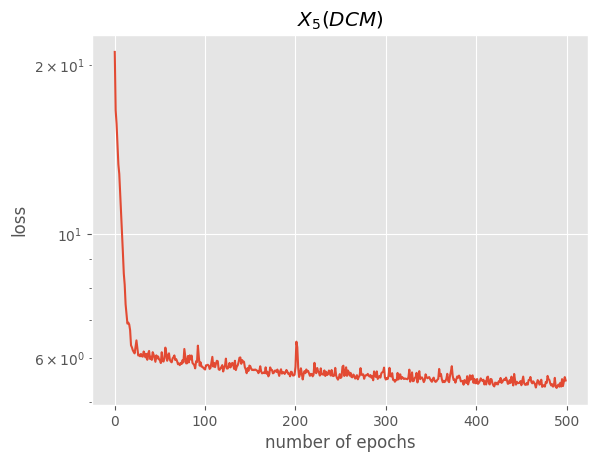

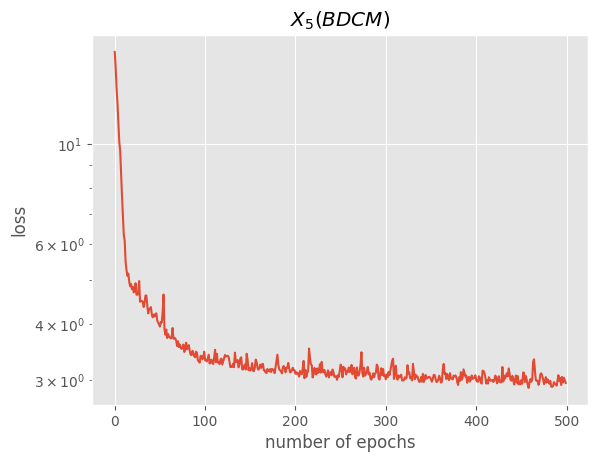

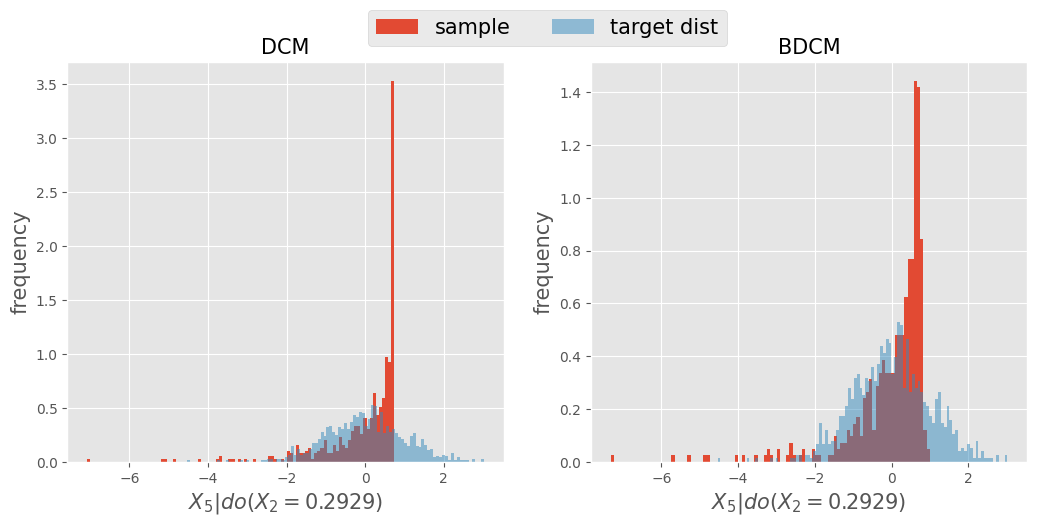

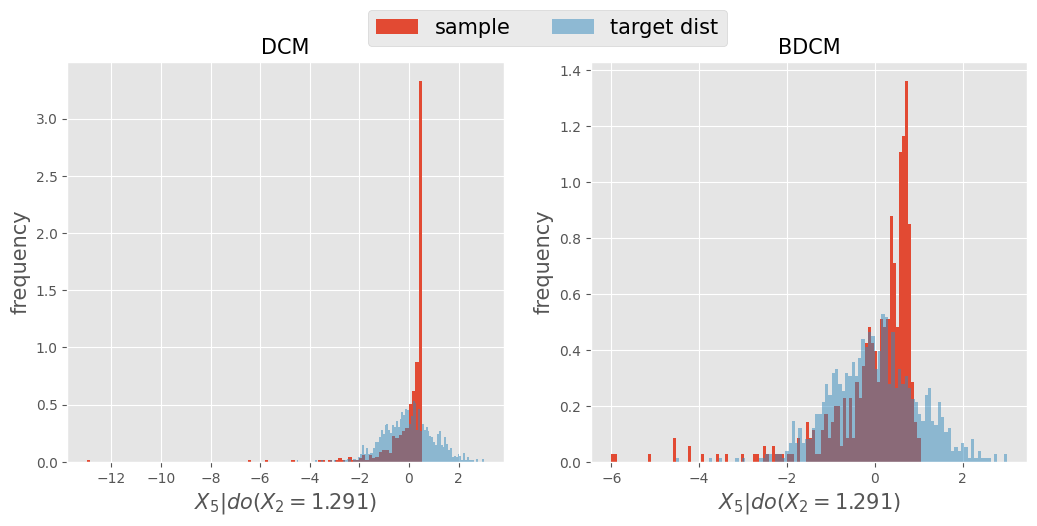

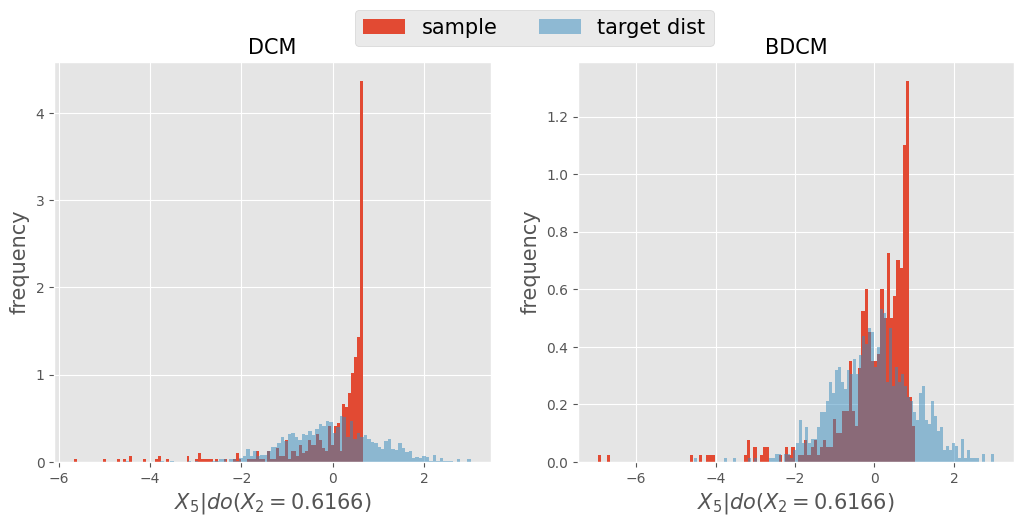

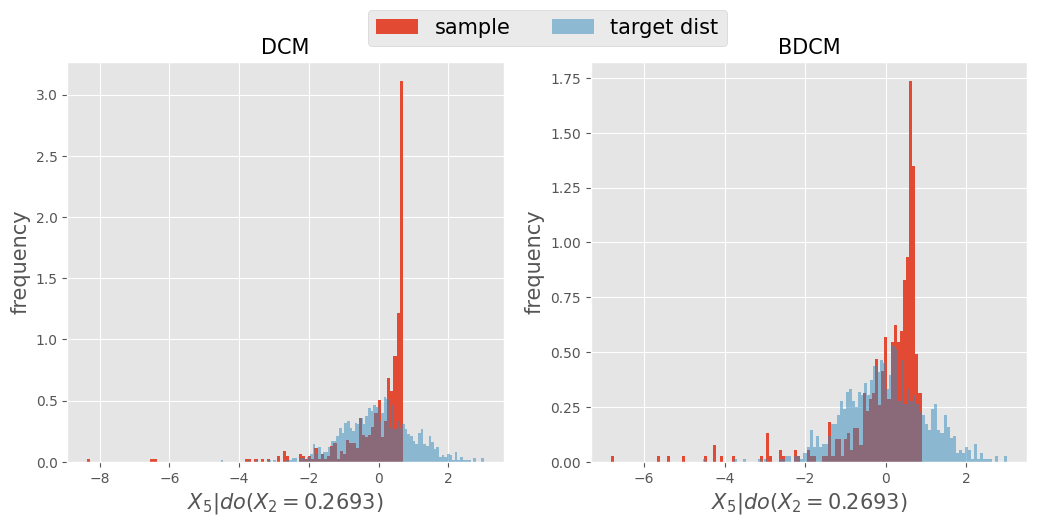

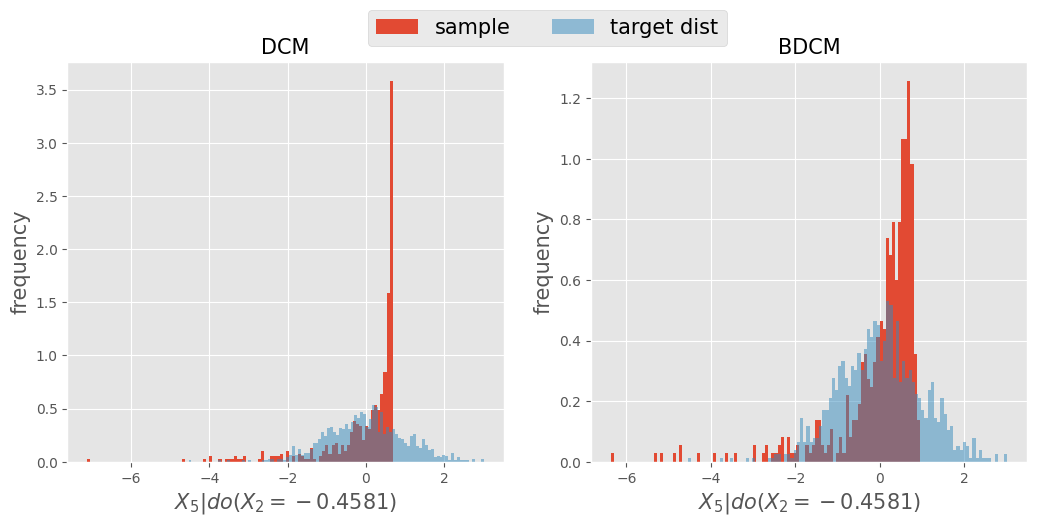

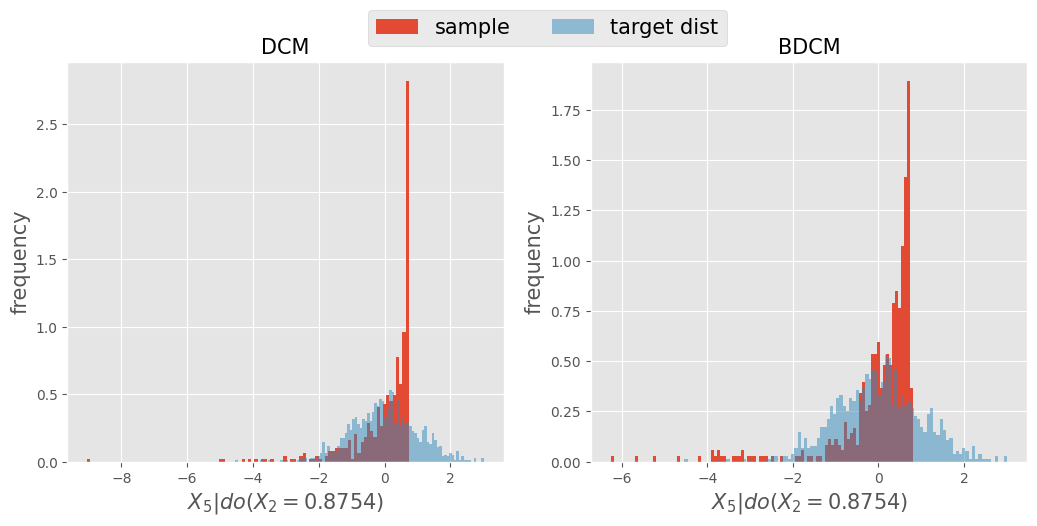

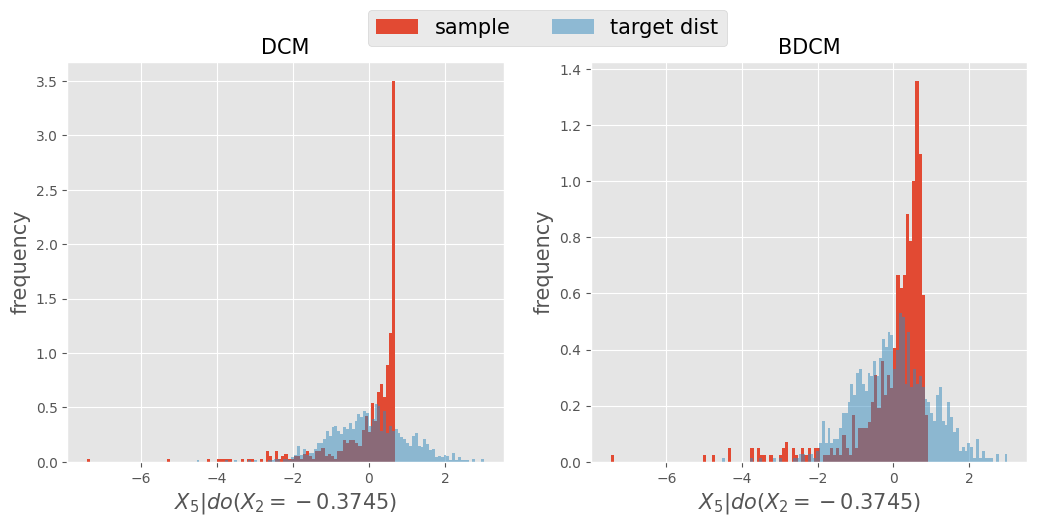

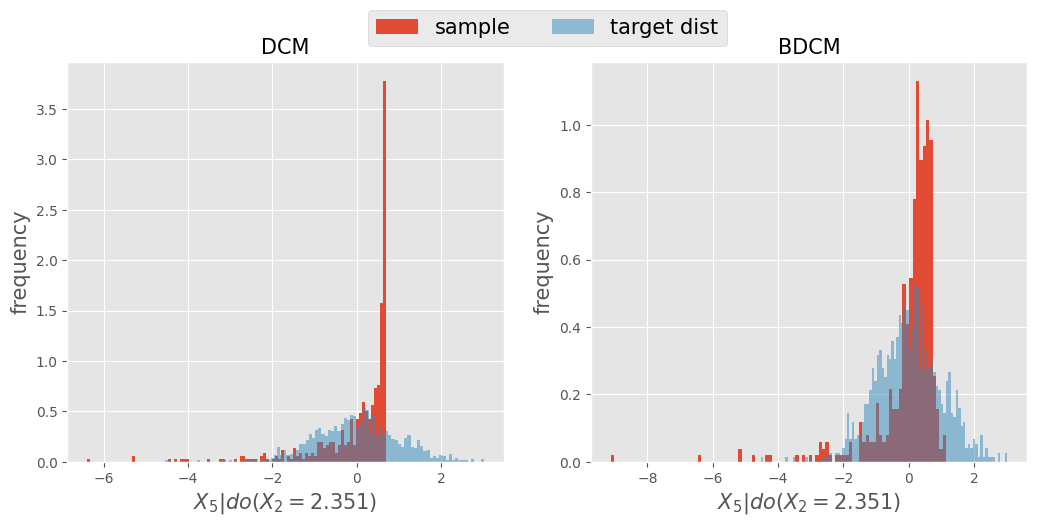

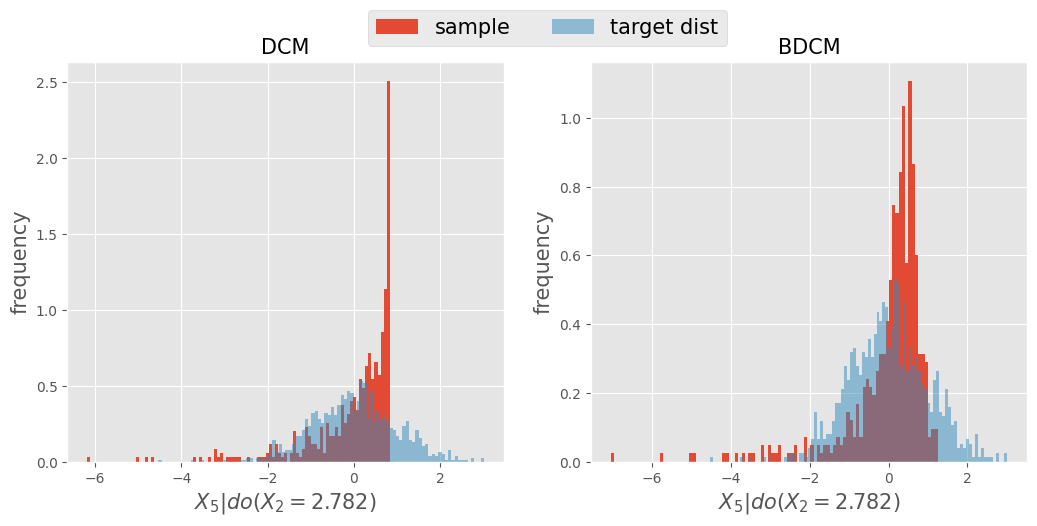

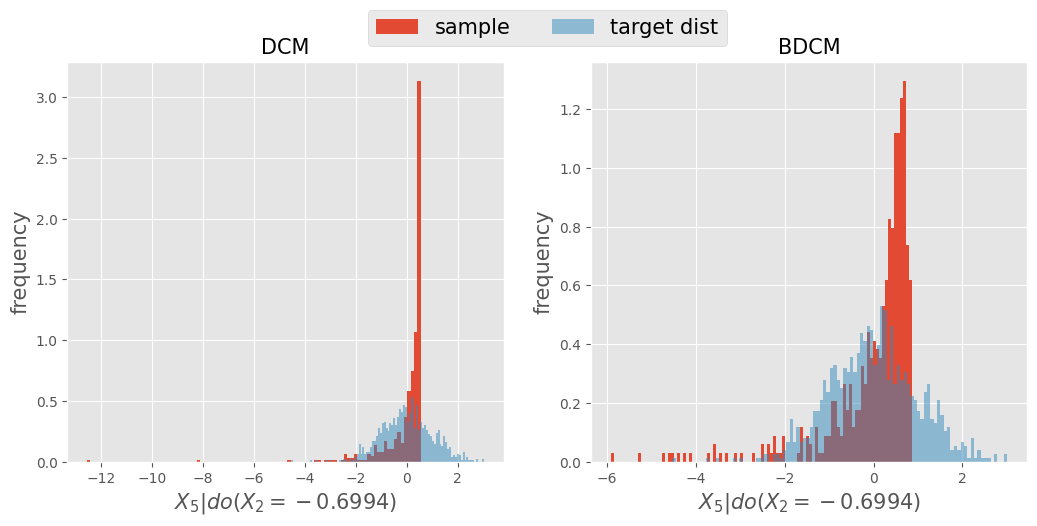

 20%|██        | 1/5 [05:24<21:36, 324.16s/it]

mean of MMD for DCM: 0.00226
standard deviation of MMD for DCM: 0.000652
mean of MMD for BDCM: 0.00228
standard deviation of MMD for BDCM: 0.000256


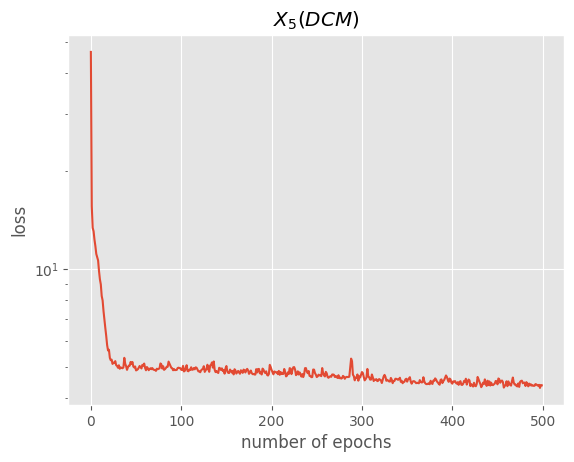

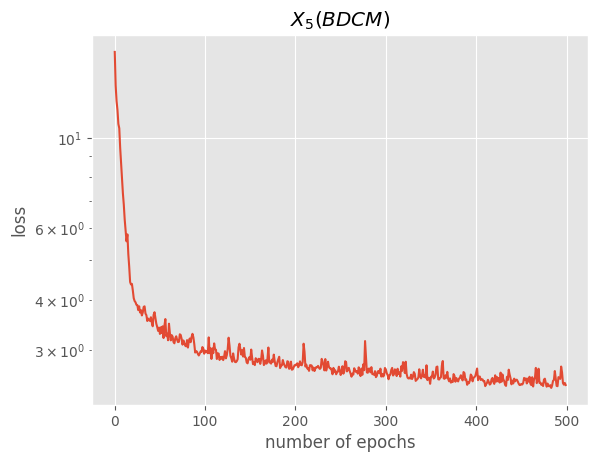

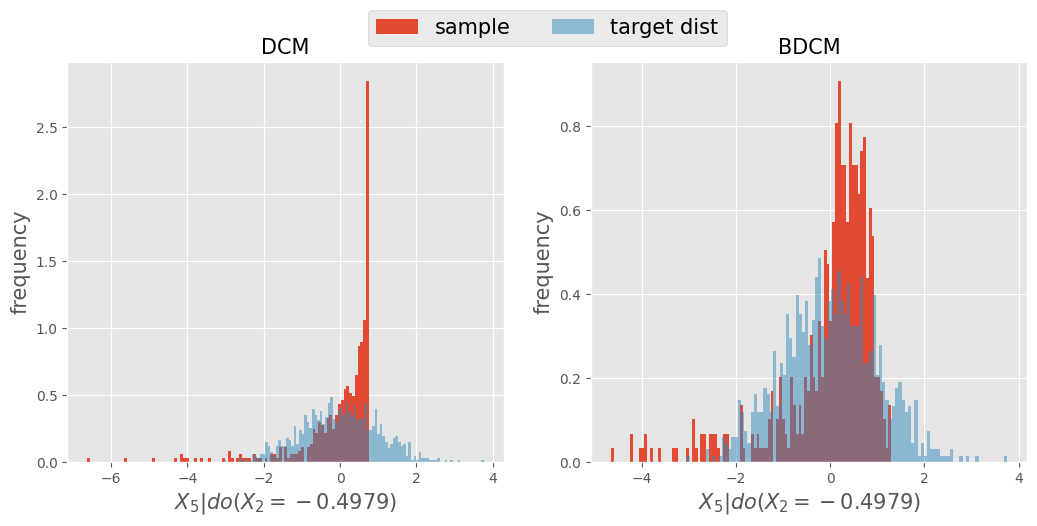

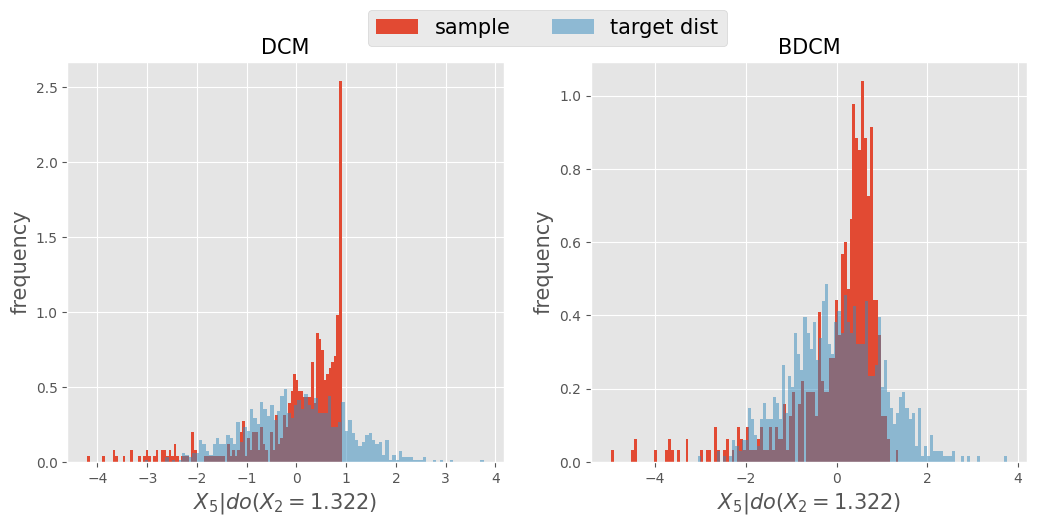

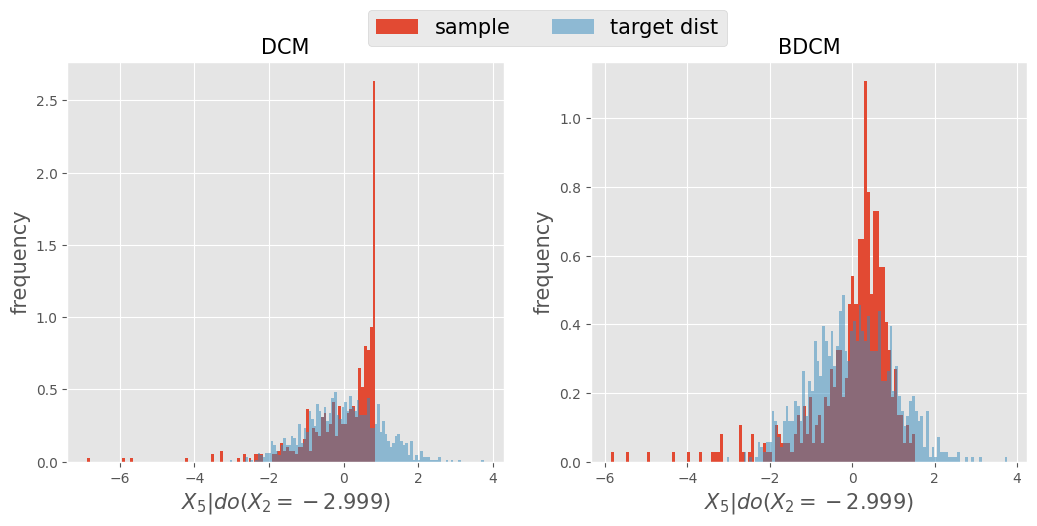

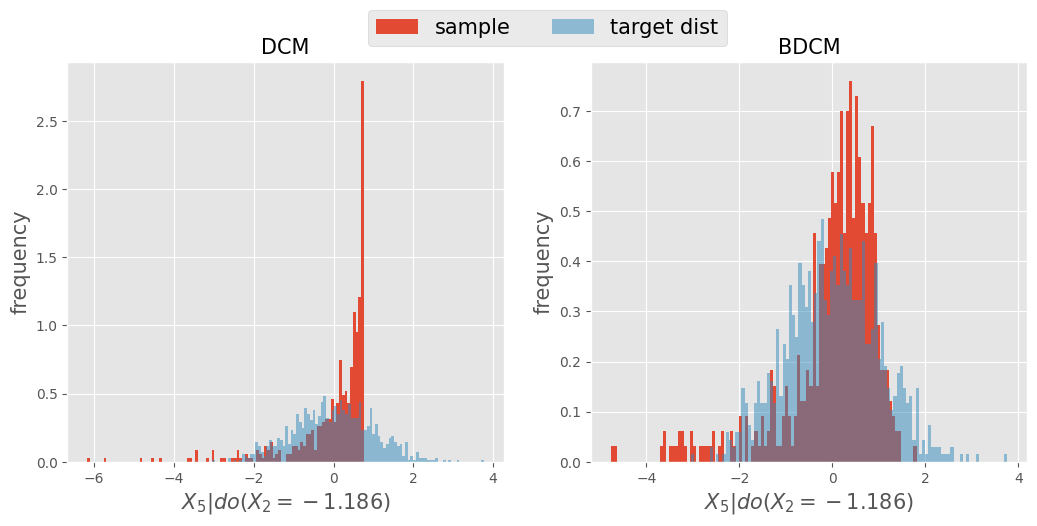

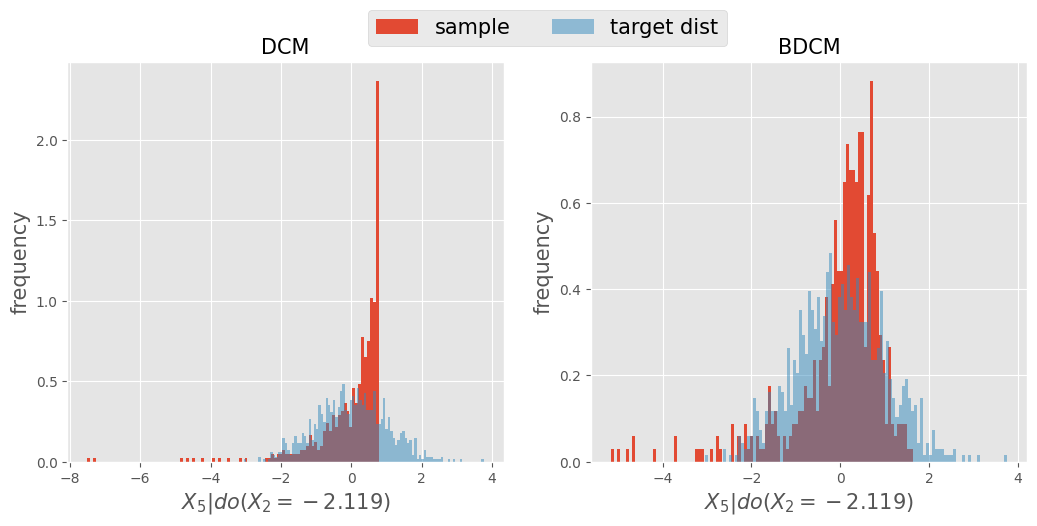

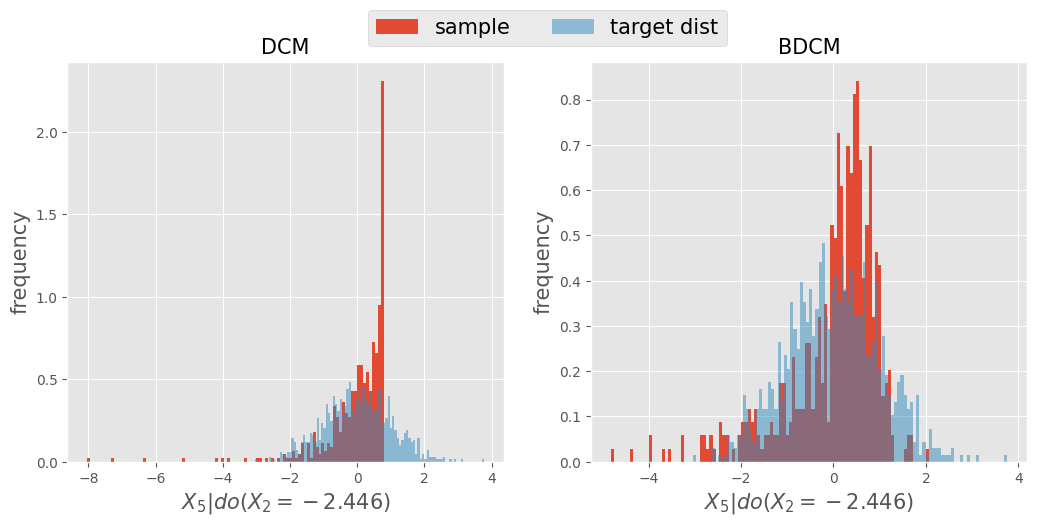

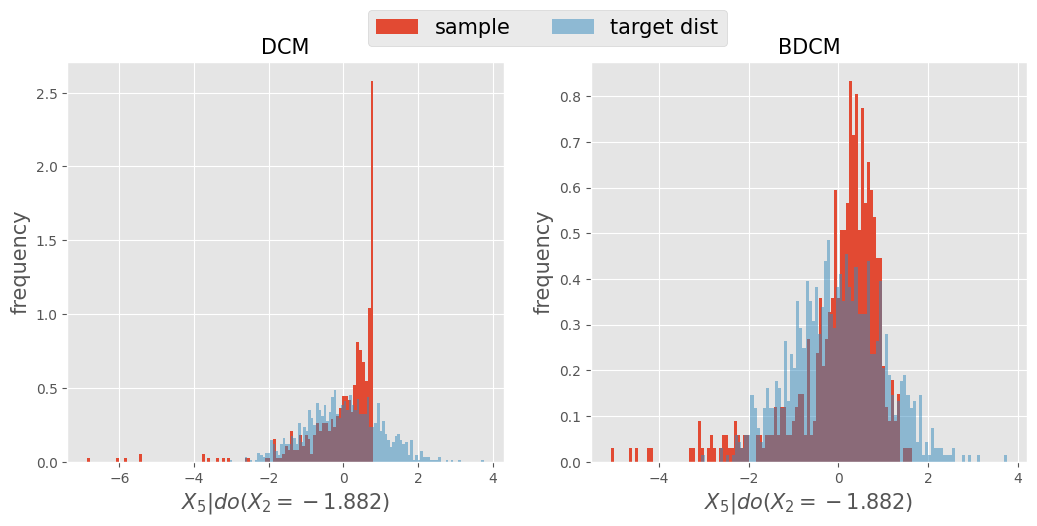

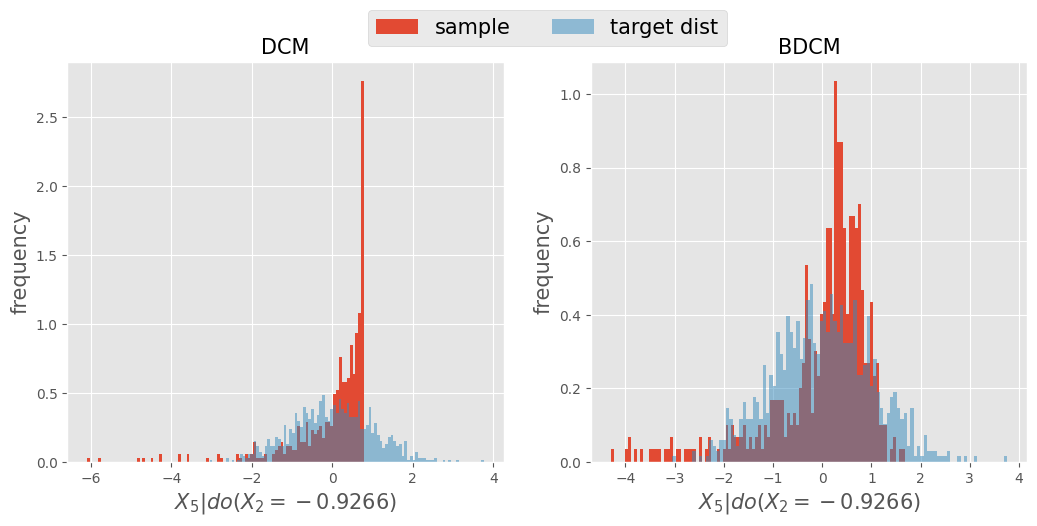

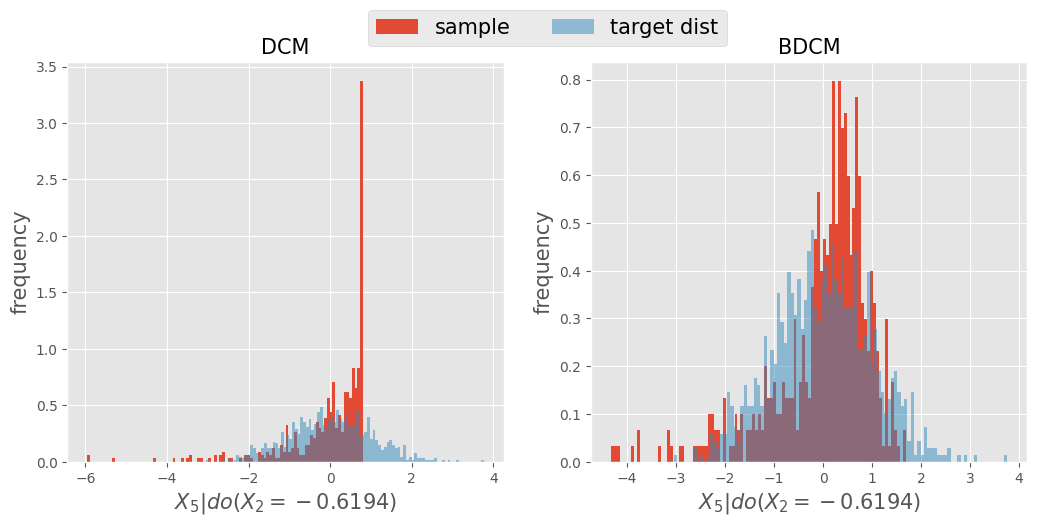

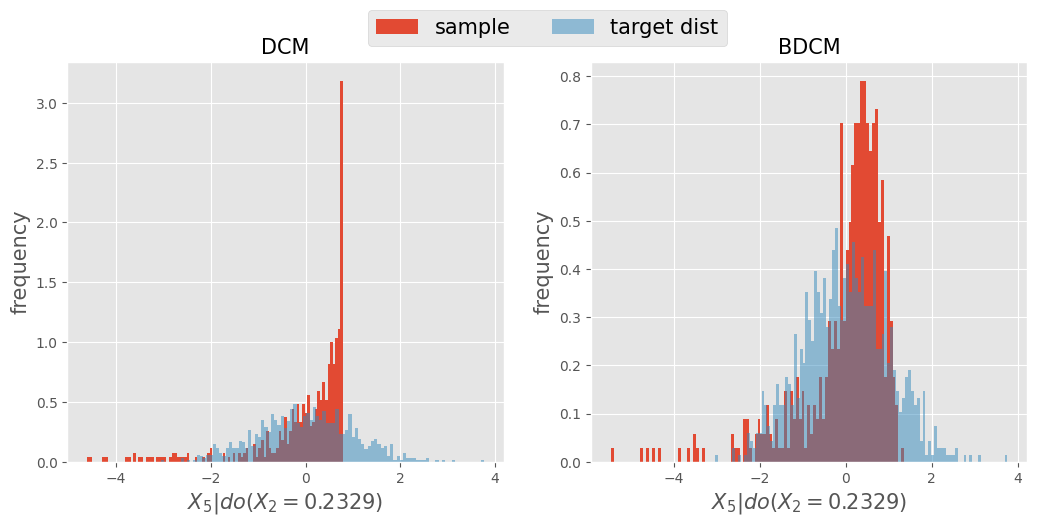

 40%|████      | 2/5 [10:44<16:06, 322.19s/it]

mean of MMD for DCM: 0.00169
standard deviation of MMD for DCM: 0.00035
mean of MMD for BDCM: 0.0011
standard deviation of MMD for BDCM: 0.000212


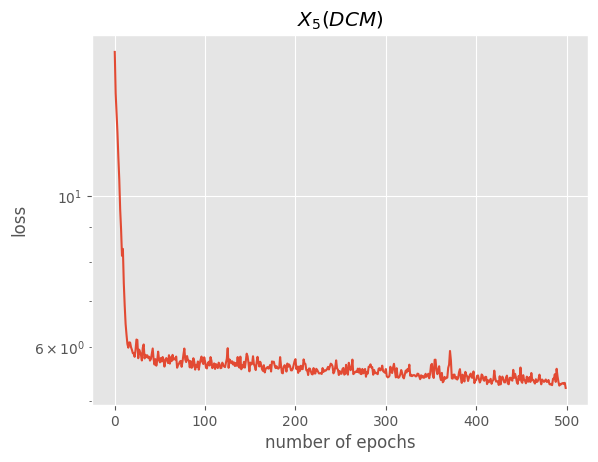

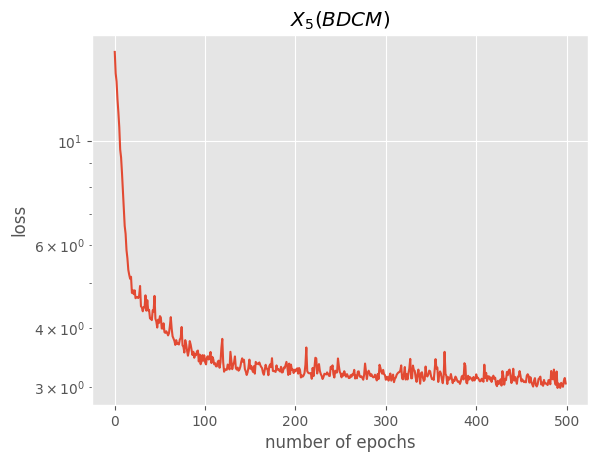

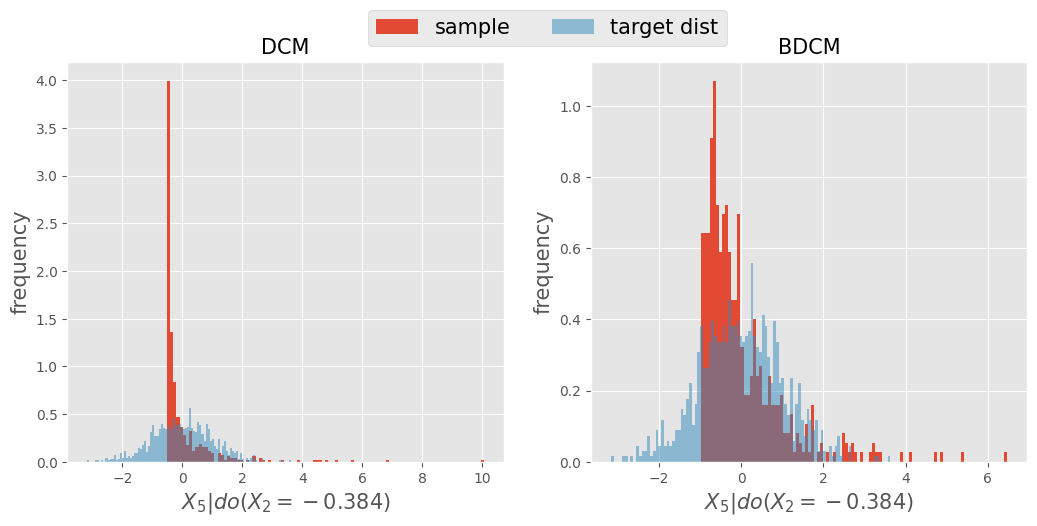

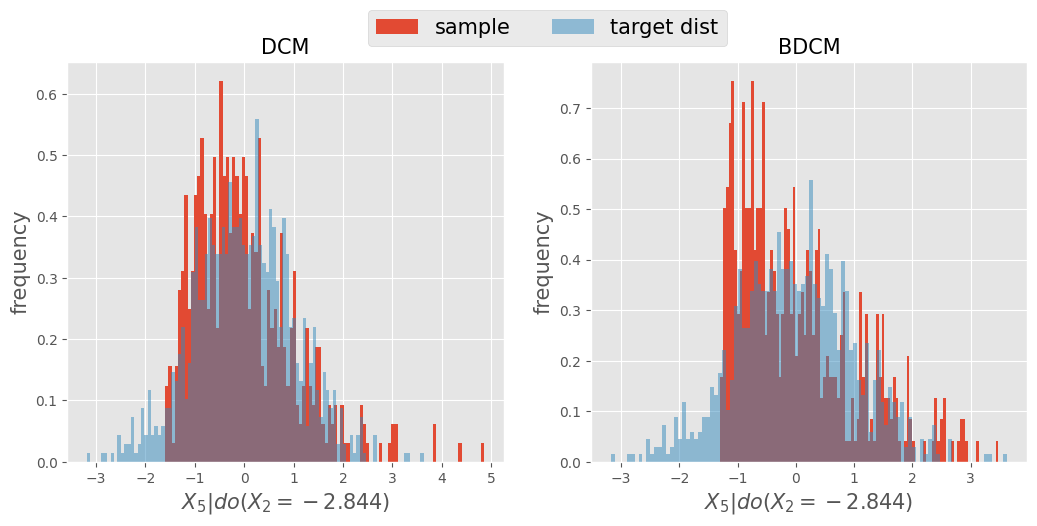

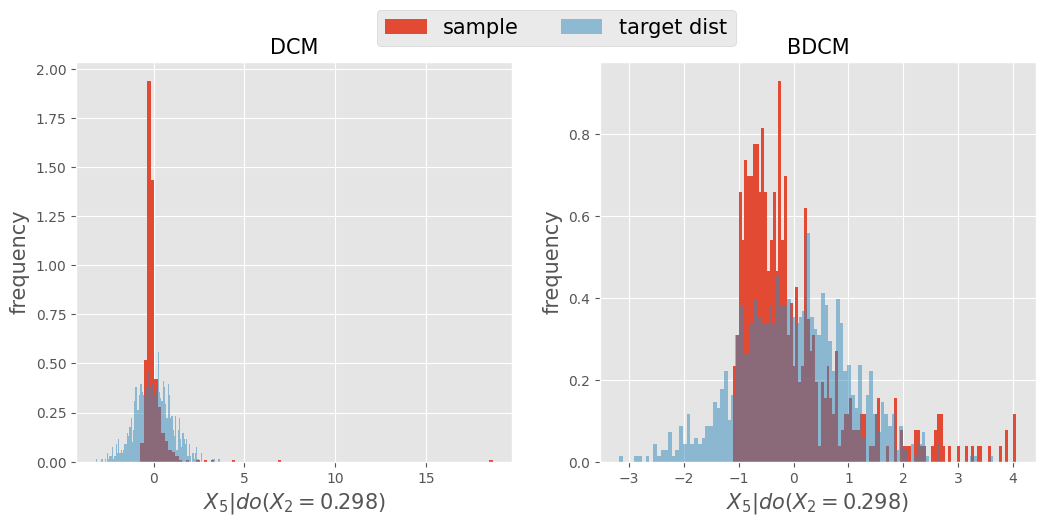

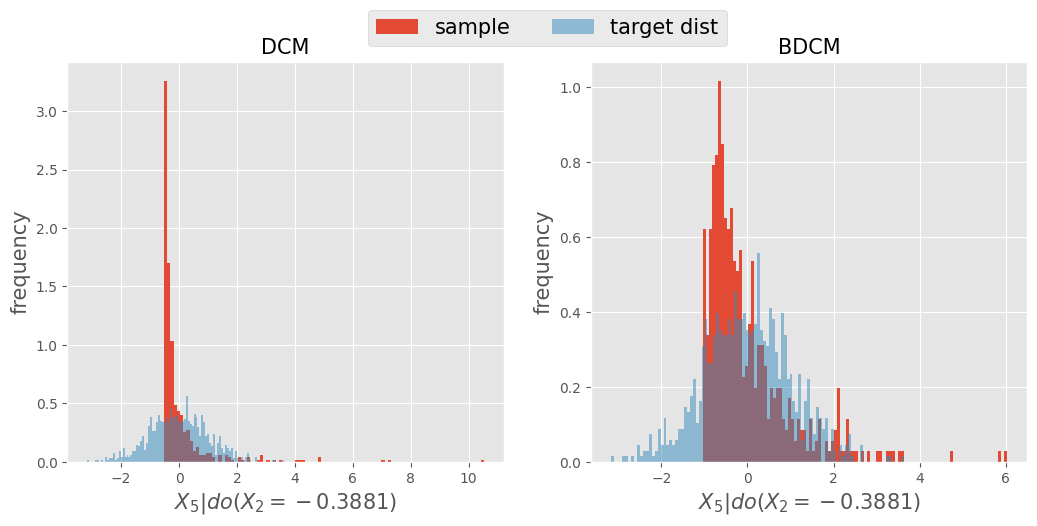

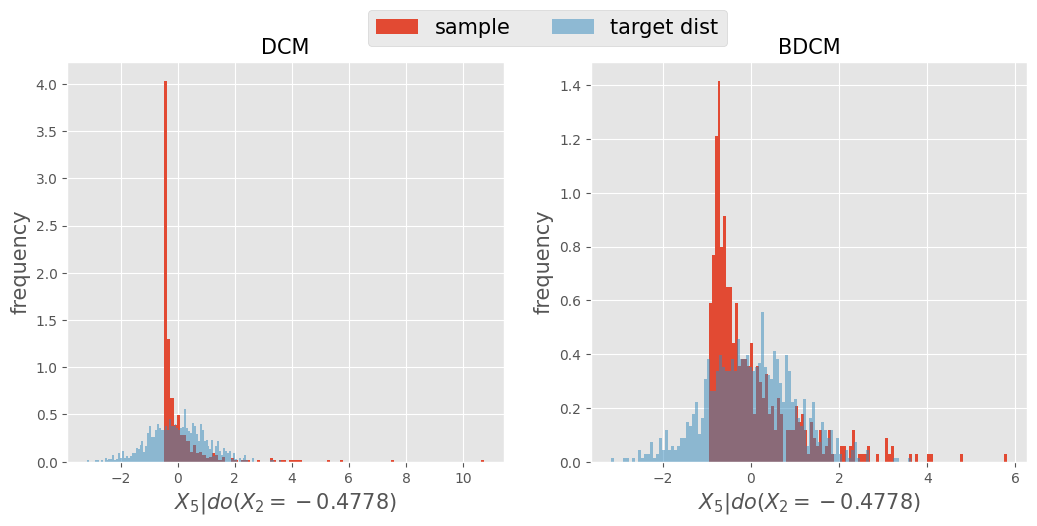

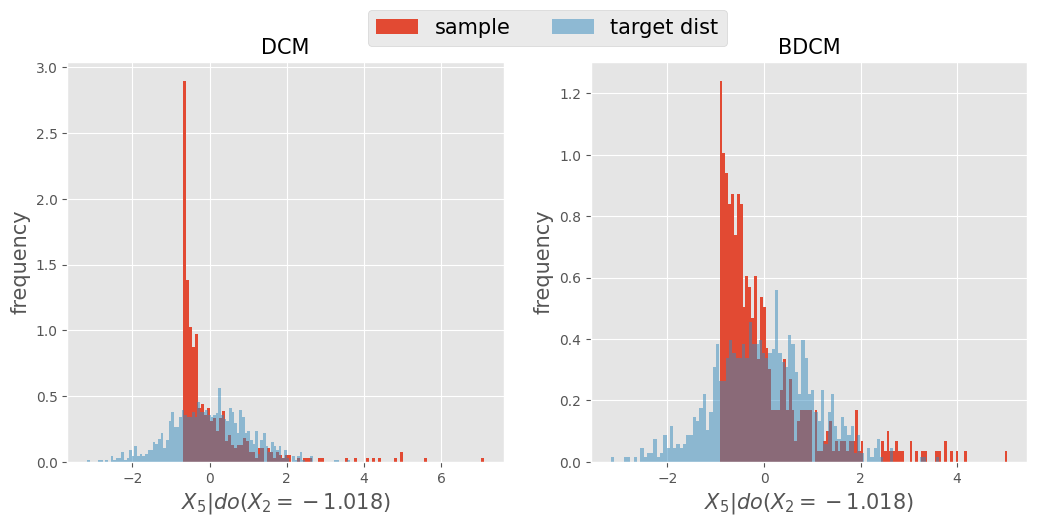

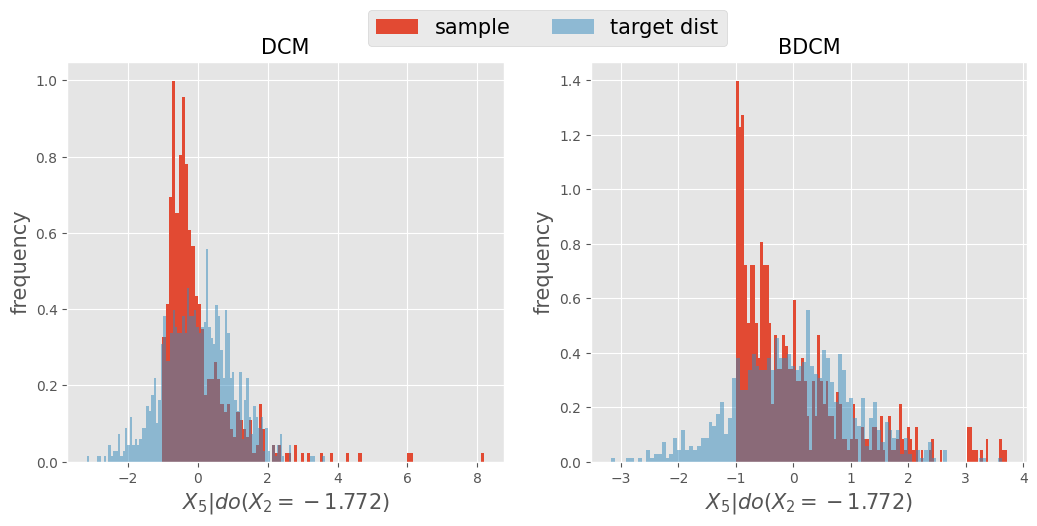

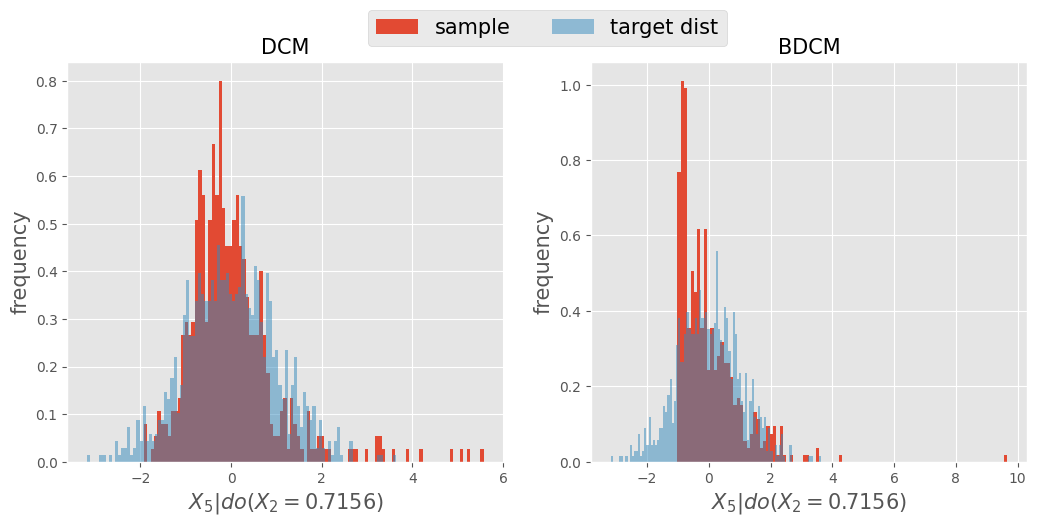

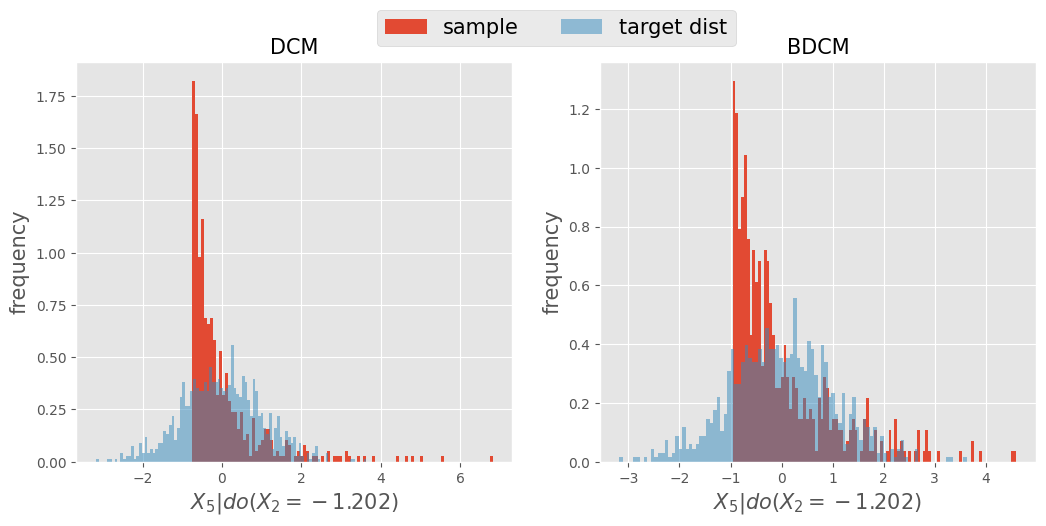

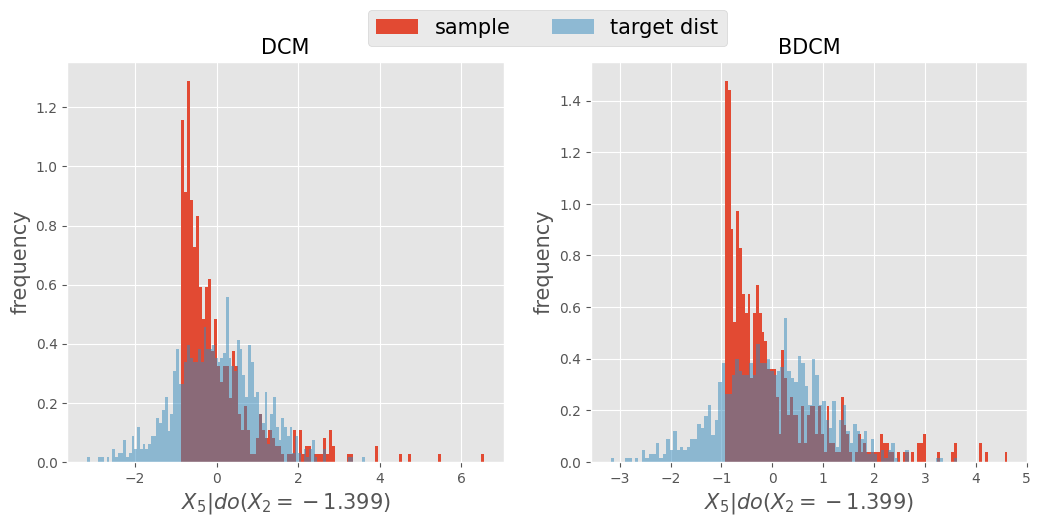

 60%|██████    | 3/5 [16:02<10:40, 320.24s/it]

mean of MMD for DCM: 0.00359
standard deviation of MMD for DCM: 0.00211
mean of MMD for BDCM: 0.00147
standard deviation of MMD for BDCM: 0.000393


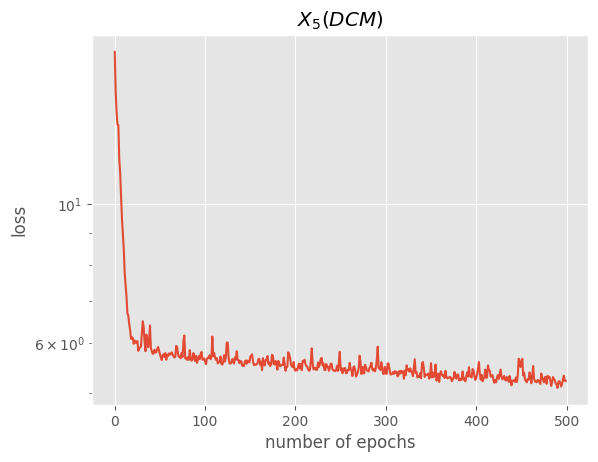

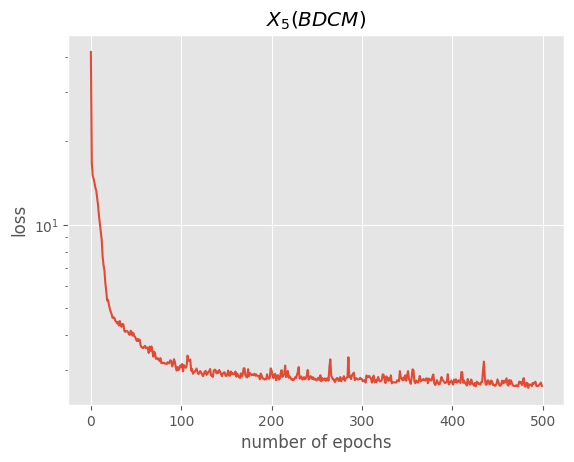

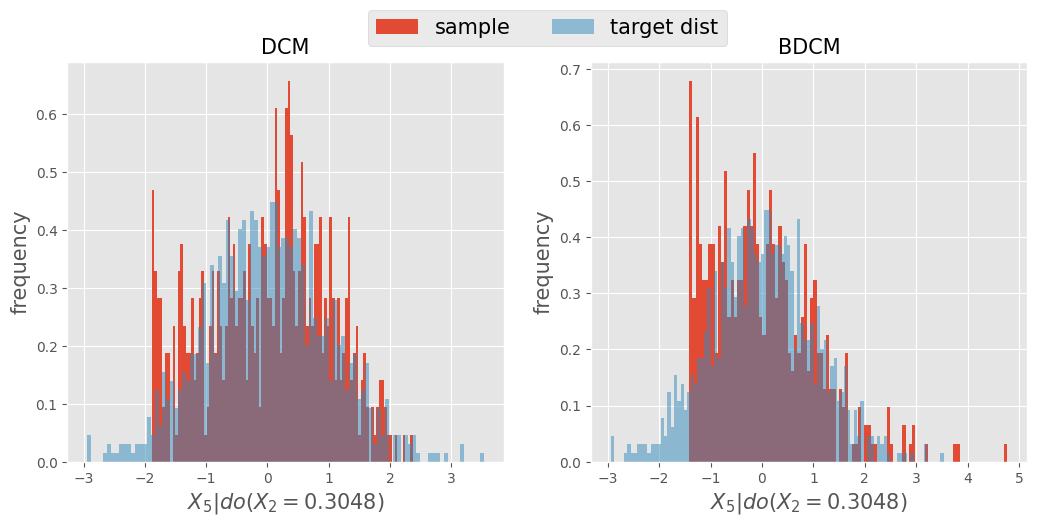

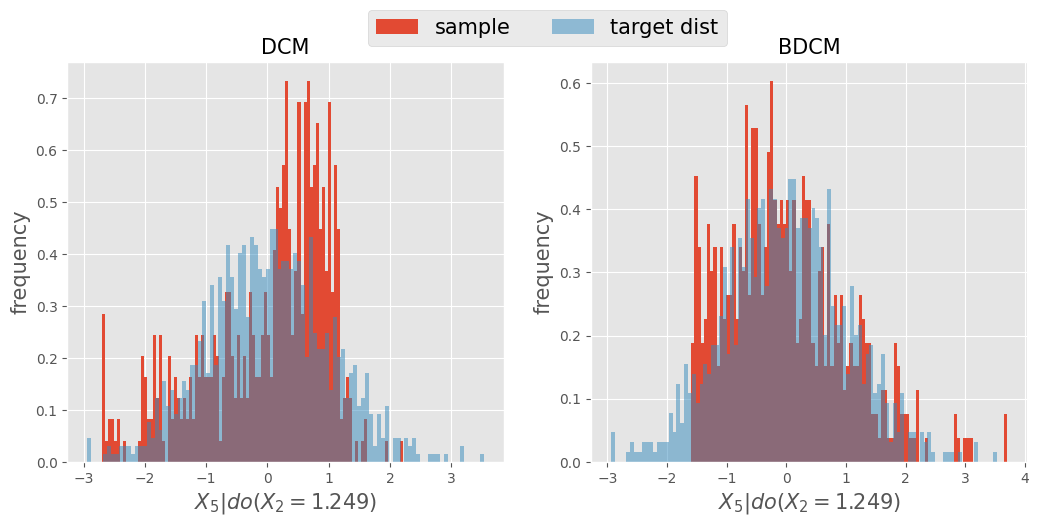

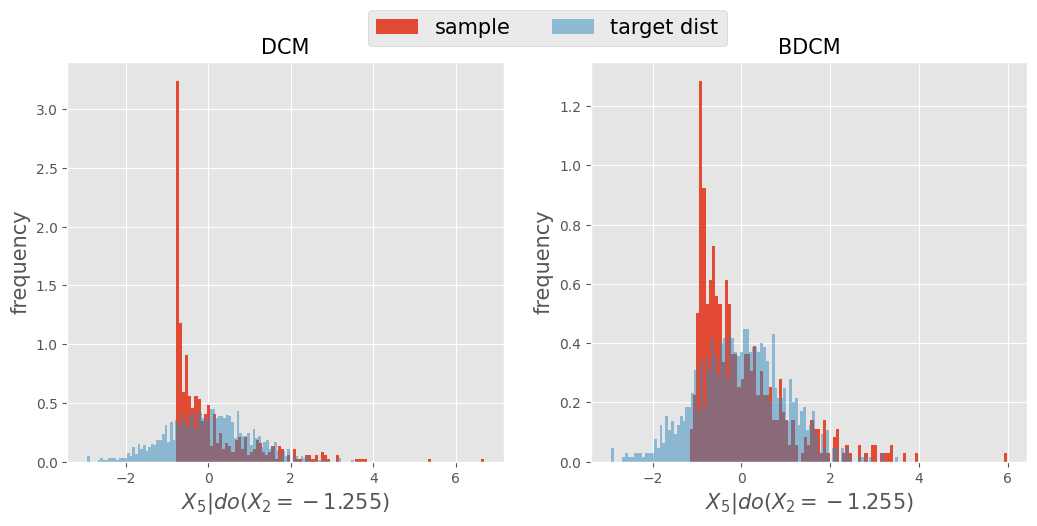

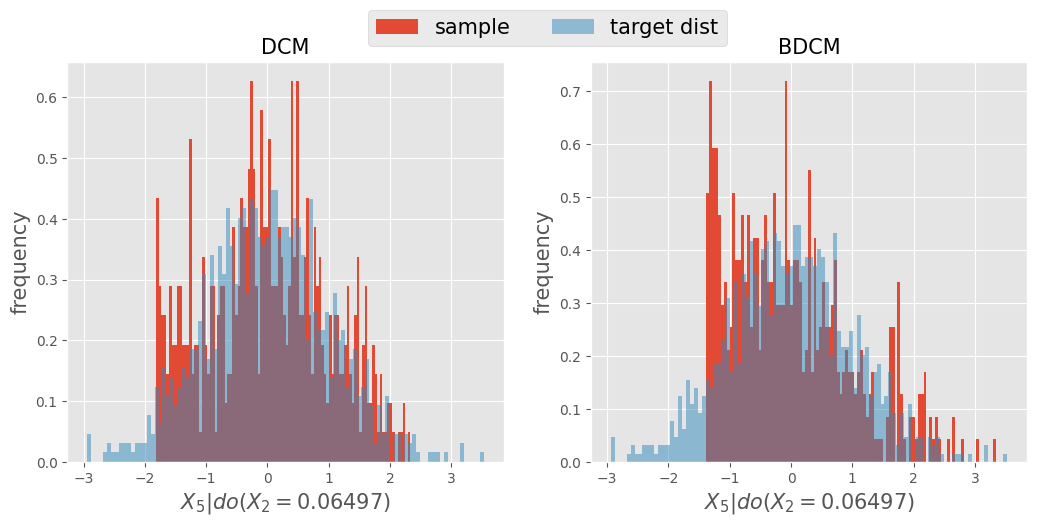

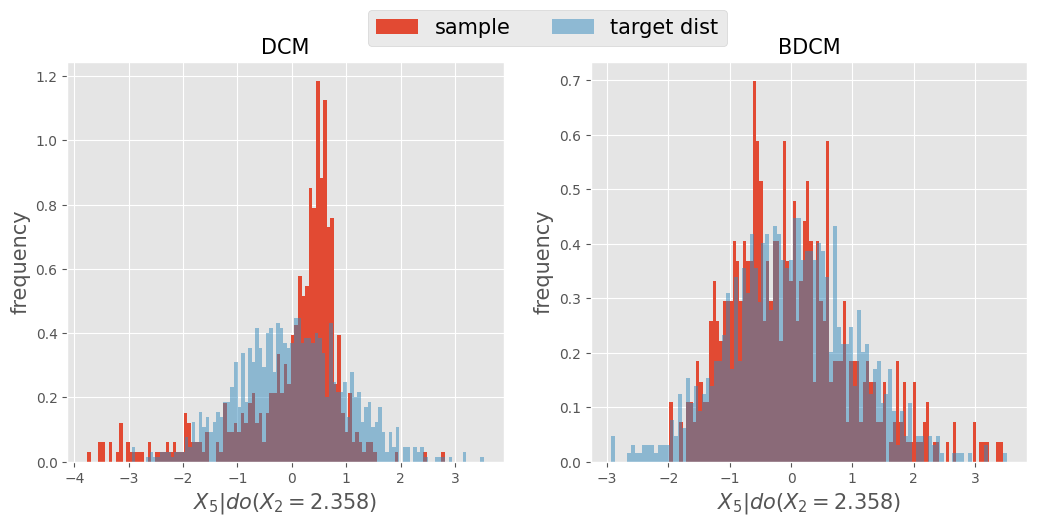

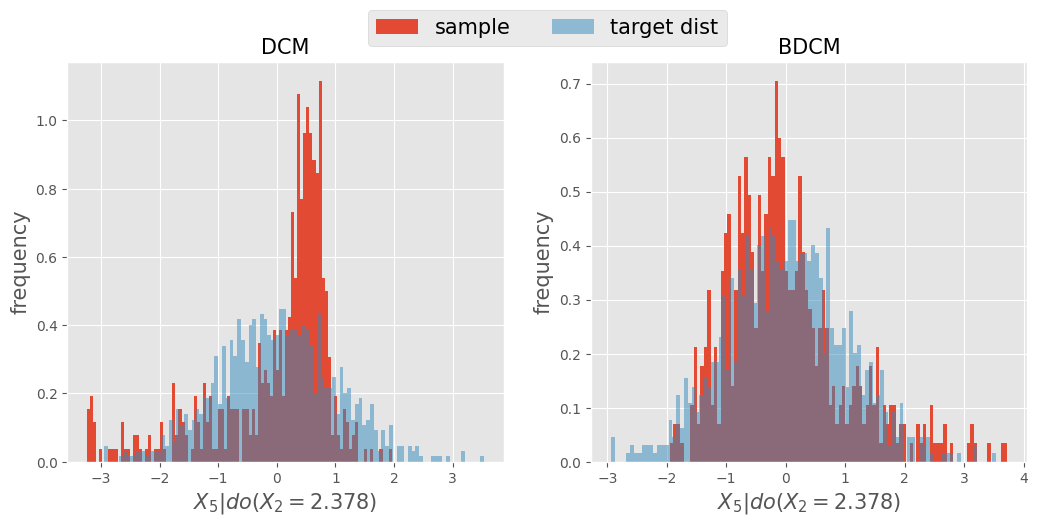

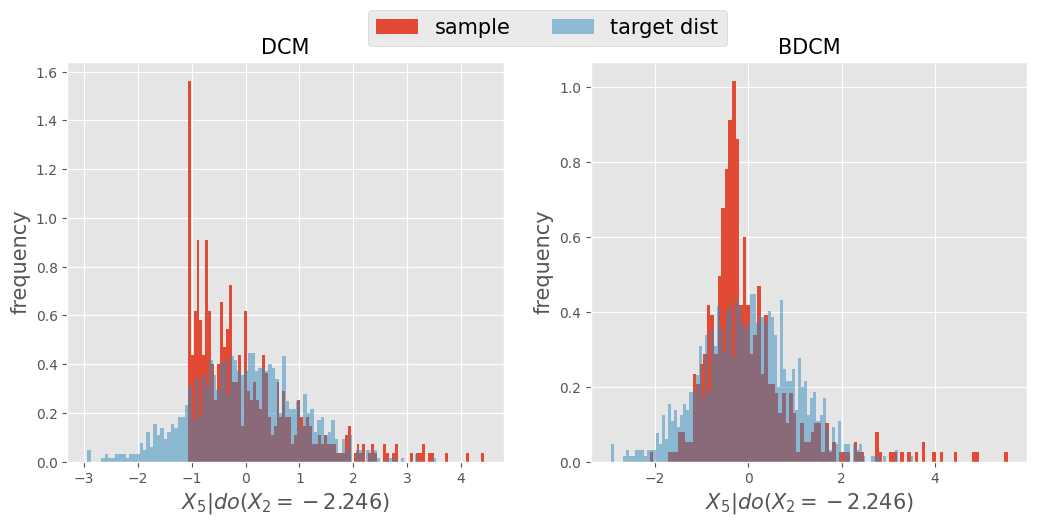

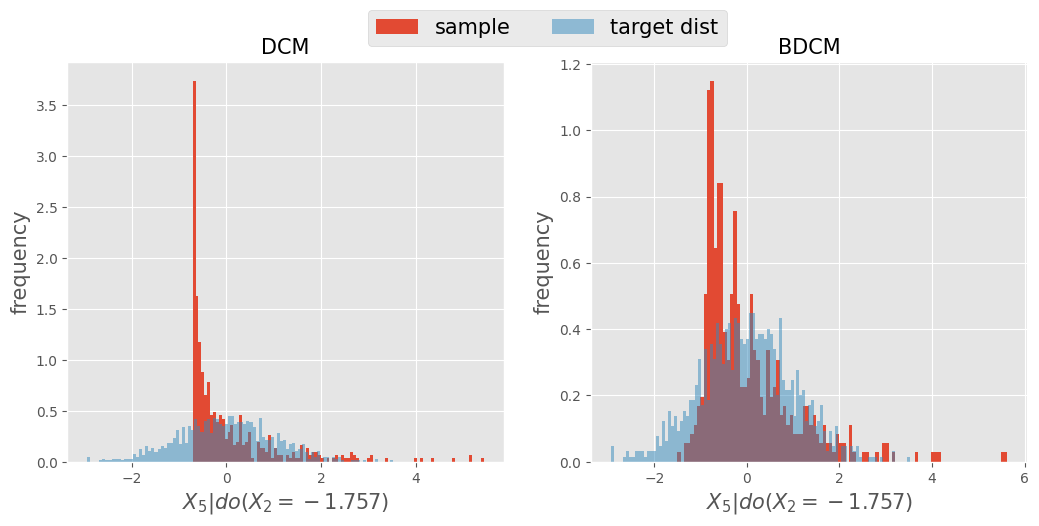

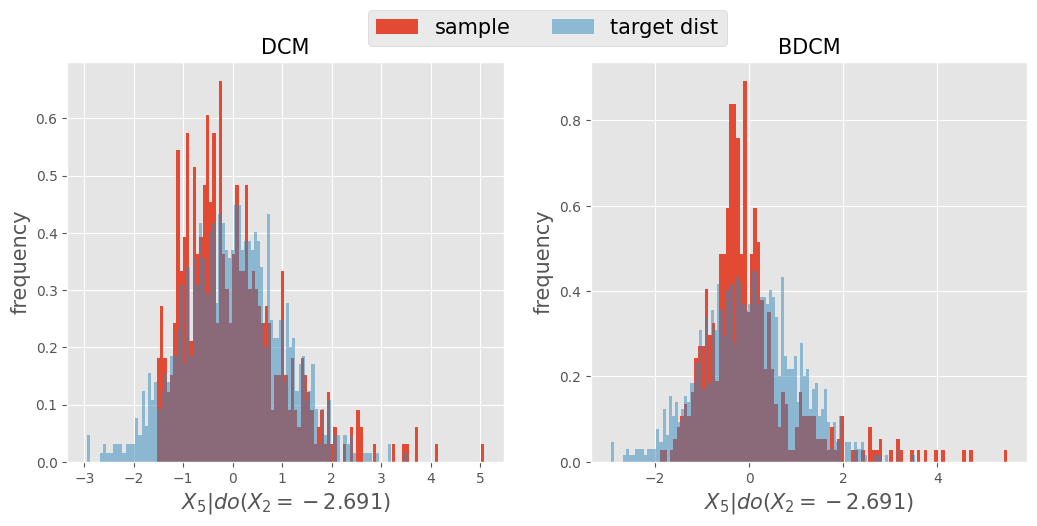

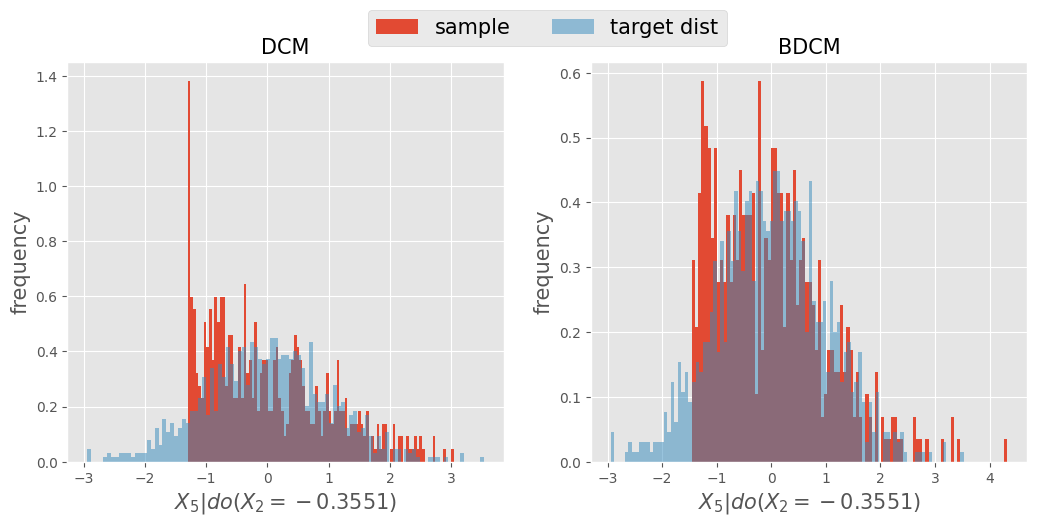

 80%|████████  | 4/5 [21:20<05:19, 319.35s/it]

mean of MMD for DCM: 0.000942
standard deviation of MMD for DCM: 0.000812
mean of MMD for BDCM: 0.00114
standard deviation of MMD for BDCM: 0.000576


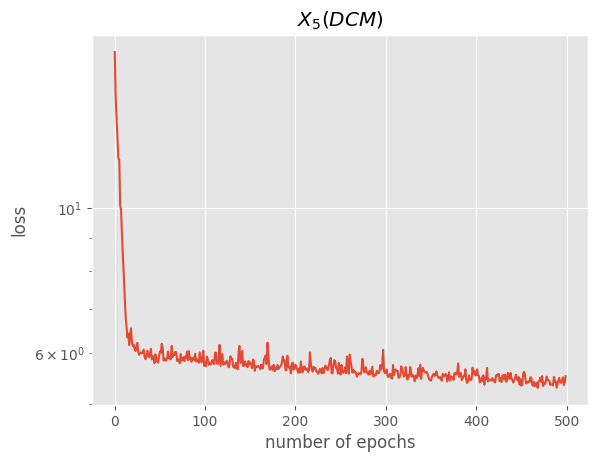

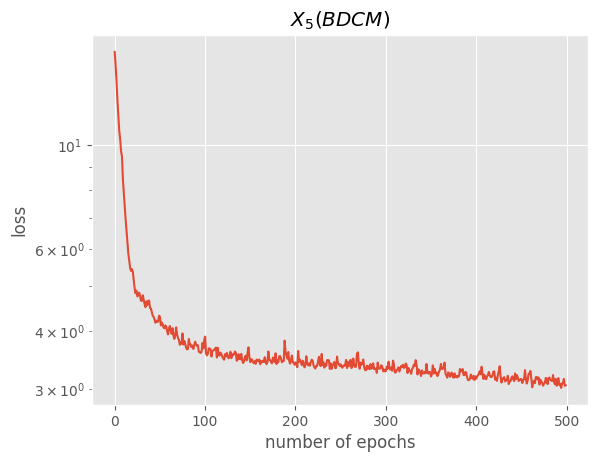

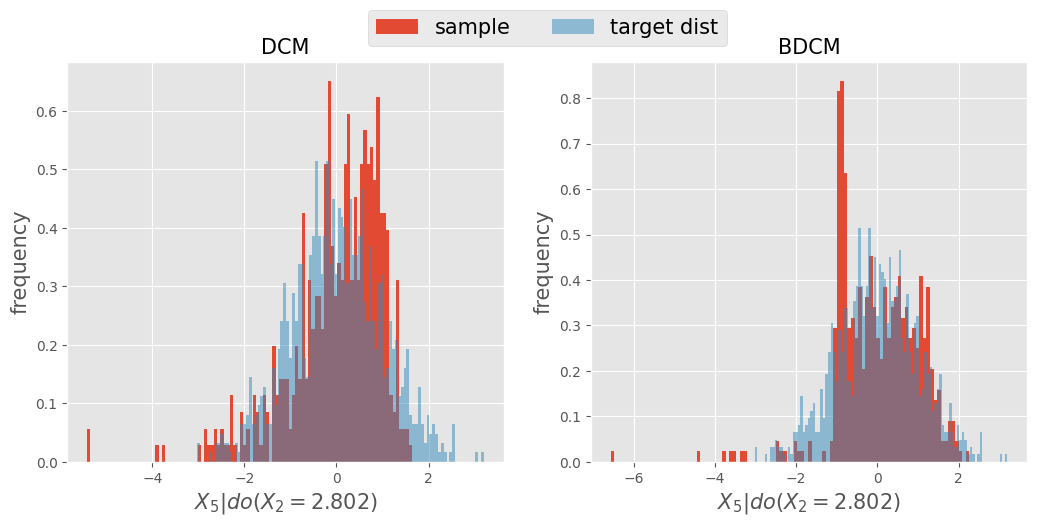

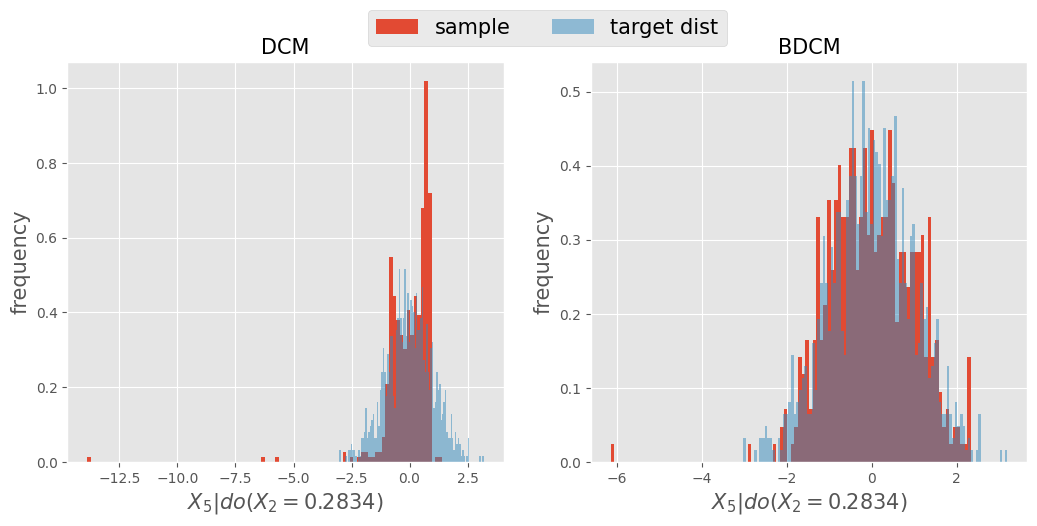

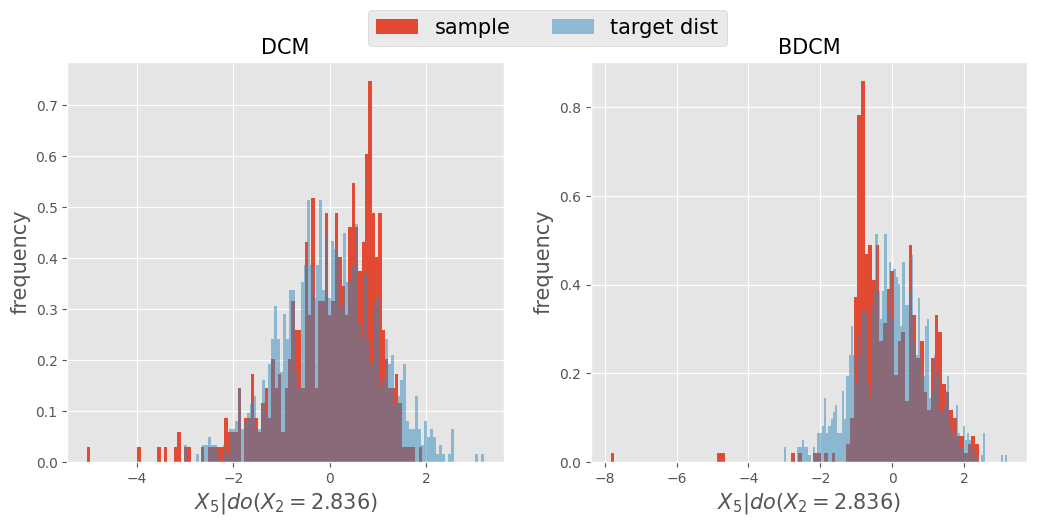

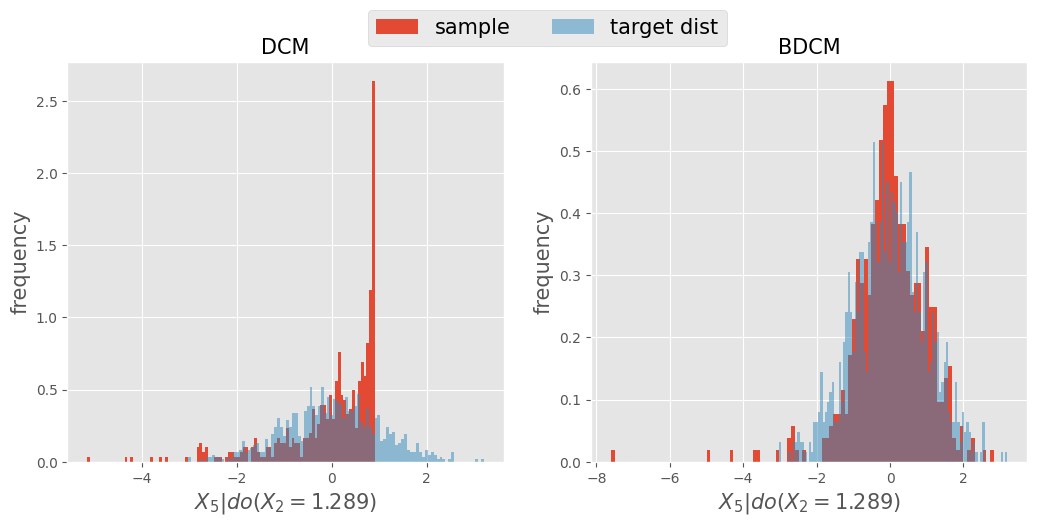

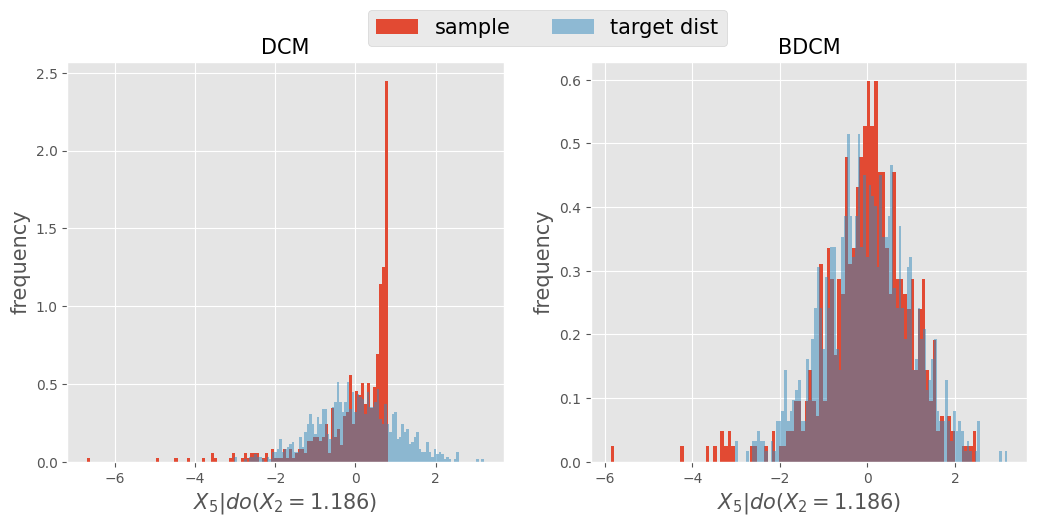

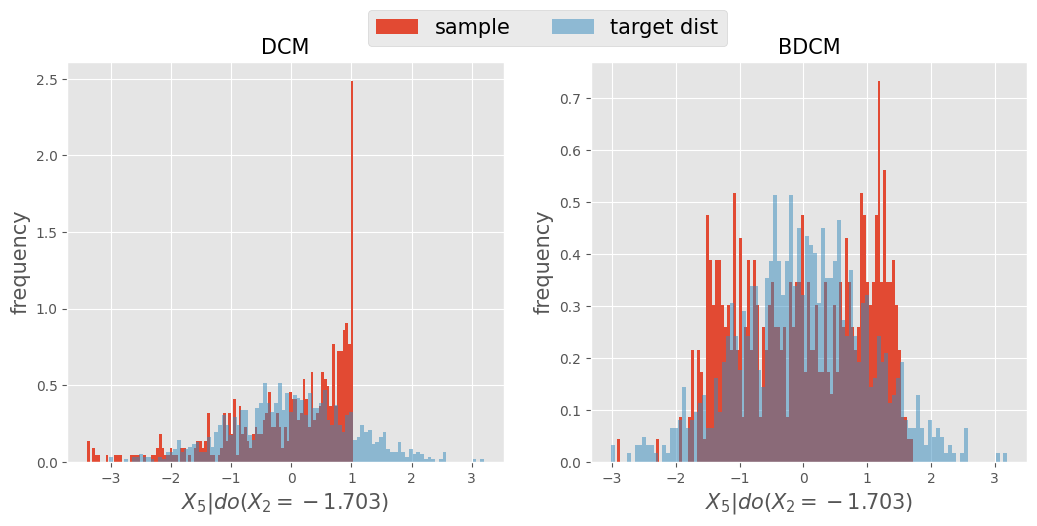

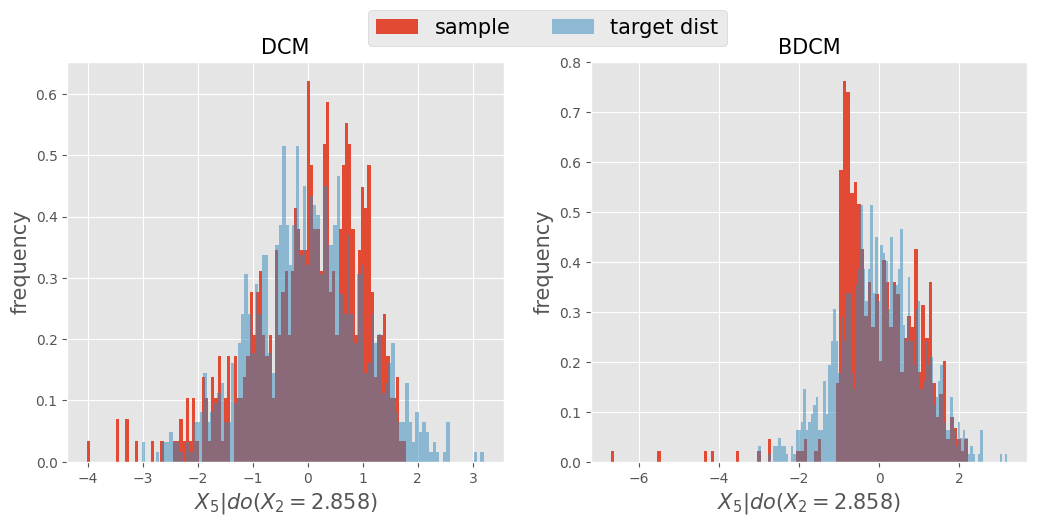

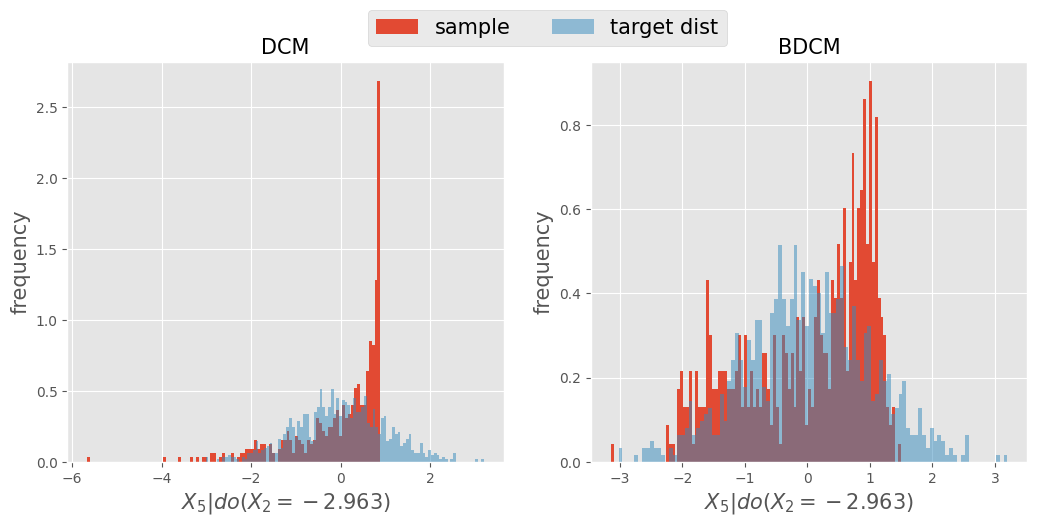

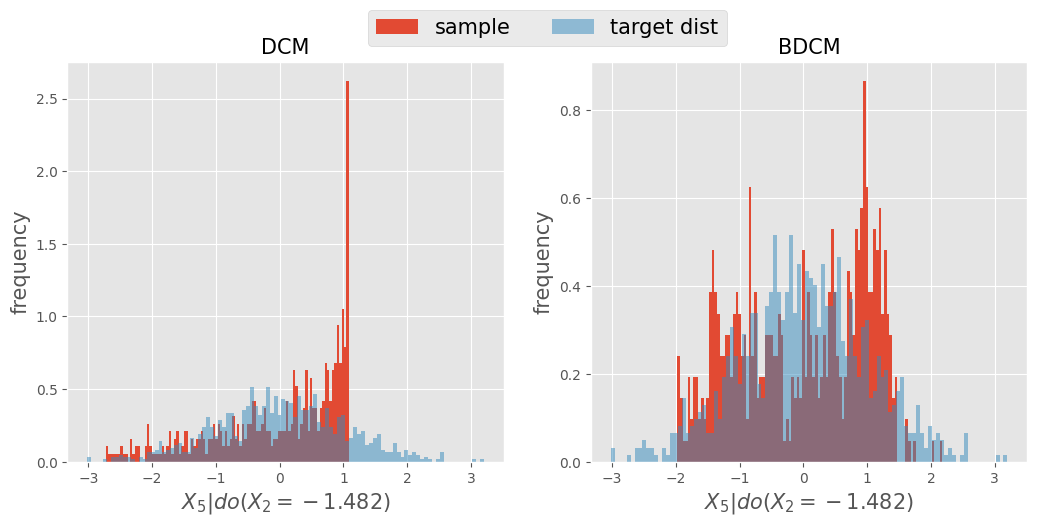

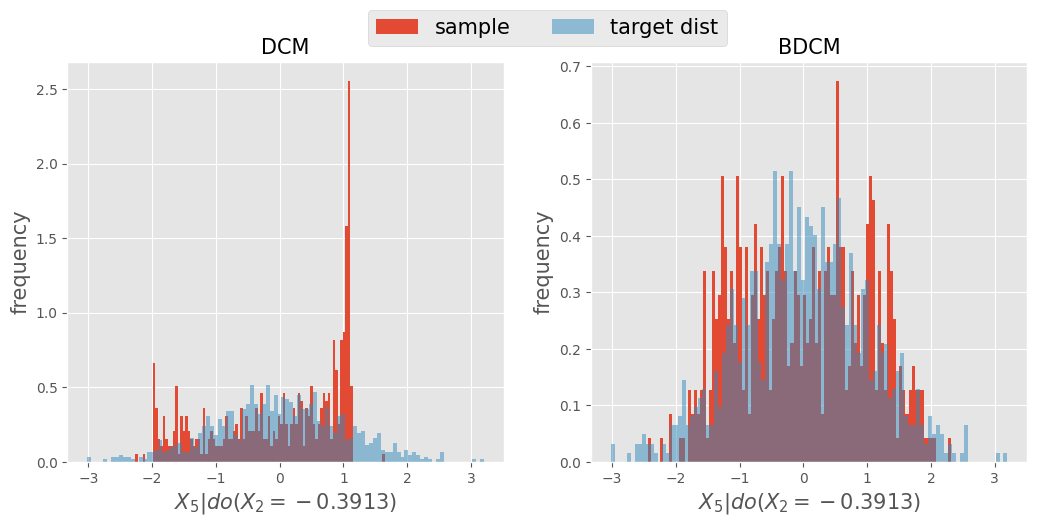

100%|██████████| 5/5 [26:38<00:00, 319.67s/it]

mean of MMD for DCM: 0.000466
standard deviation of MMD for DCM: 0.00049
mean of MMD for BDCM: 0.000235
standard deviation of MMD for BDCM: 6.85e-05
mean of all MMD for DCM: 0.00179
standard deviation of all MMD for DCM: 0.00154
mean of all MMD for BDCM: 0.00124
standard deviation of all MMD for BDCM: 0.000744


In [6]:
def structural_eq(u, ind, x):
  if ind == 0:
    output = u
  elif ind == 1:
    output = x[0] ** 2+ u
  elif ind == 2:
    output = 2 * x[0] + u
  elif ind == 3:
    output = x[2] + u
  elif ind == 4:
    output = x[1] + 2 * x[3] + u
  return normalize(output)

SCM1(structural_eq=structural_eq, simple_or_complex = "simple")